In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import numpy as np

import os

from numpy import polyfit,polyval
import sys
sys.path.append('/reg/neh/home/qiaoshen/GitHub/loki/src/RingData/')

from DiffCorr import DiffCorr

from matplotlib.gridspec import GridSpec

In [82]:
def norm_w_mask(x,mask, threshold):
    x_out = np.zeros_like(x, dtype=np.float64)

    for ii in range(x.shape[0]):
        k=np.median(x[ii][mask[ii]])
        mu = np.std(x[ii][mask[ii]])
        this_mask = (np.abs(x[ii] - k)<mu*threshold)*mask[ii]
        x_out[ii] =( x[ii]-(x[ii][this_mask]).mean() )* this_mask
    return x_out

def diff_all_shots(images,mask,threshold):
    images = norm_all_shots(images, mask, threshold)
    diffs = images - images.mean(0)[None,:]
    
    return diffs, images

def norm_all_shots(images,mask, threshold):
    norms = np.zeros_like(images, dtype=np.float64)
    for ii in range(norms.shape[0]):
        norms[ii]=norm_w_mask(images[ii],mask, threshold)
    return norms

In [26]:
file_dir = '/reg/d/psdm/cxi/cxilr6716/scratch/flatfield_calibration/interp_cali_shots/interp_600_800/'
run=109
f=h5py.File(os.path.join(file_dir,'run%d_interp_cali_shots.h5'%run), 'r')
print f.keys()

f_interp = h5py.File('/reg/d/psdm/cxi/cxilr6716/scratch/flatfield_calibration/interp_dermPoly_shots/interp_200_400/run115_interp_dermPoly_shots.h5','r')

[u'cali_single_shots_10_interp', u'cali_single_shots_10_rp', u'cali_single_shots_15_interp', u'cali_single_shots_15_rp', u'cali_single_shots_20_interp', u'cali_single_shots_20_rp', u'cali_single_shots_5_interp', u'cali_single_shots_5_rp', u'single_shots_interp', u'single_shots_rp']


In [33]:
# interp5 =f['cali_single_shots_20_interp'].value
interp5=f['cali_single_shots_5_interp'].value
interp10=f['cali_single_shots_10_interp'].value


rp5 =f['cali_single_shots_5_rp'].value
rp10=f['cali_single_shots_10_rp'].value

raw=f['single_shots_interp'].value
raw_rp=f['single_shots_rp'].value

In [34]:
raw.shape

(296, 200, 5040)

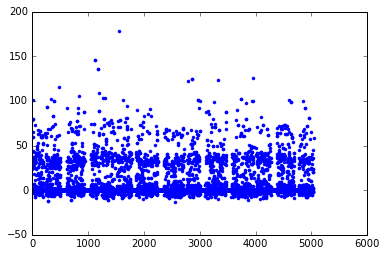

In [35]:
# plt.plot(interp5[0,0],'.')
# plt.plot(interp10[0,0],'.')
plt.plot(raw[3,0],'.')

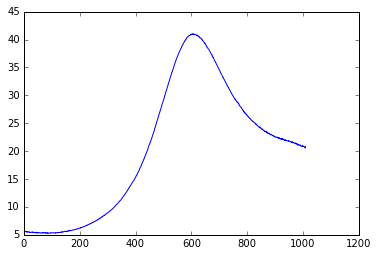

In [36]:

# y=rp10.mean(0)
# x=np.arange(0,y.shape[0])

# select=np.abs(y-y.mean())<y.std()
# y=y[select]

# plt.plot(x,y)
# plt.plot(x,rp5.mean(0))
plt.plot(raw_rp.mean(0))
# plt.ylim(45,57)
# plt.ylim(1,1.6)

In [37]:
interp5.shape
interp10.shape

(296, 200, 5040)

(2, 10)

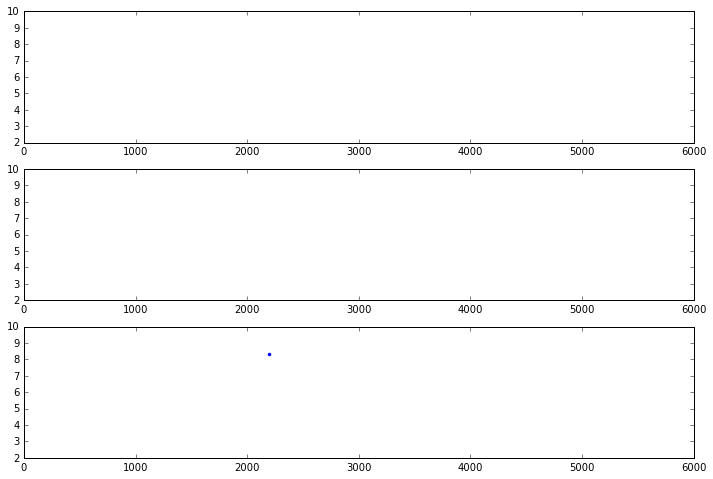

In [38]:
ii=70
plt.figure(figsize=[12,8])
gs = GridSpec(3,1)
plt.subplot(gs[0,0])
plt.plot(raw.mean(0)[ii],'.')
plt.ylim(2,10)
plt.subplot(gs[1,0])
plt.plot(interp10.mean(0)[ii],'.')
plt.ylim(2,10)
plt.subplot(gs[2,0])
plt.plot(interp5.mean(0)[ii],'.')
plt.ylim(2,10)

In [51]:
ii=100
phi_offset=10
# mm = pmask[ii]
mm = ~(raw.mean(0)[ii]==0)
dc = DiffCorr(mm[None,:], np.array([0.1]),0,pre_dif=True)
mm_cor= dc.autocorr()

x = raw.mean(0)[ii]
x-=x[mm].mean()
x*=mm
dc = DiffCorr(x[None,:], np.array([0.1]),0,pre_dif=True)
plt.plot((dc.autocorr())[0,phi_offset:num_phi/2-phi_offset],'.')

x = interp10.mean(0)[ii]
x-=x[mm].mean()
x*=mm
dc = DiffCorr(x[None,:], np.array([0.1]),0,pre_dif=True)
plt.plot( (dc.autocorr())[0,phi_offset:num_phi/2-phi_offset],'.')
# plt.ylim(-100,2005)


x = interp5.mean(0)[ii]
mm=~(x==0)
x-=x[mm].mean()
x*=mm
dc = DiffCorr(x[None,:], np.array([0.1]),0,pre_dif=True)
plt.plot( (dc.autocorr())[0,phi_offset:num_phi/2-phi_offset],'.')


plt.ylim(-100,200)


NameError: name 'num_phi' is not defined

In [41]:
raw_mean_interp = raw.mean(0)
mean_interp10=interp10.mean(0)
mean_interp5=interp5.mean(0)

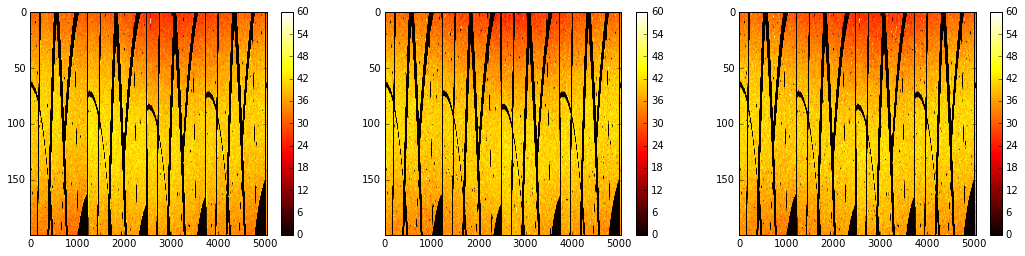

In [60]:
plt.figure(figsize=[18,4])
gs = GridSpec(1,3)
plt.subplot(gs[0,0] )
plt.imshow(raw_mean_interp,aspect='auto',
          cmap='hot',vmin=0,vmax=60)
plt.colorbar()


plt.subplot(gs[0,1])
plt.imshow(mean_interp10,aspect='auto',
          cmap='hot',vmin=0,vmax=60)
plt.colorbar()


plt.subplot(gs[0,2])
plt.imshow(mean_interp5,aspect='auto',
          cmap='hot',vmin=0,vmax=60)
plt.colorbar()

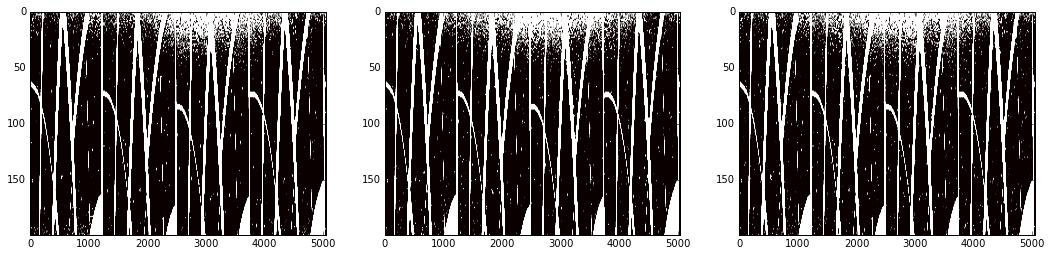

In [62]:
plt.figure(figsize=[18,4])
gs = GridSpec(1,3)
plt.subplot(gs[0,0] )

threshold=30
plt.imshow(raw_mean_interp<threshold,aspect='auto',
          cmap='hot')
# plt.colorbar()


plt.subplot(gs[0,1])
plt.imshow(mean_interp10<threshold,aspect='auto',
          cmap='hot')
# plt.colorbar()


plt.subplot(gs[0,2])
plt.imshow(mean_interp5<threshold,aspect='auto',
          cmap='hot')
# plt.colorbar()

In [44]:
pmask = ~(raw.mean(0)==0)
pmask2 = ~(interp5.mean(0)==0)

In [83]:
raw_diffs, norm_raw=diff_all_shots(raw,pmask,10)
interp5_diff, norm_5 = diff_all_shots(interp5,pmask2,10)

interp10_diff, norm_10 = diff_all_shots(interp10,pmask,10)

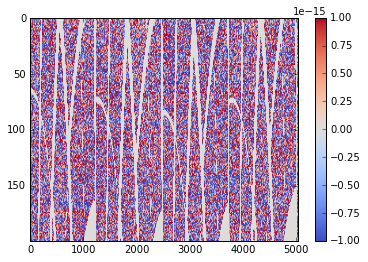

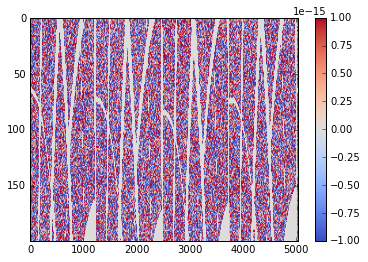

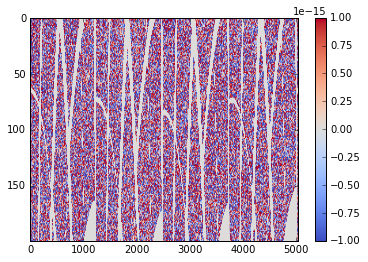

In [87]:
x=-1e-15
y=1e-15
plt.imshow(raw_diffs.mean(0), aspect='auto'
          ,vmin=x,vmax=y, cmap='coolwarm')
plt.colorbar()
plt.figure()
plt.imshow(interp10_diff.mean(0), aspect='auto'
          ,vmin=x,vmax=y, cmap='coolwarm')
plt.colorbar()

plt.figure()
plt.imshow(interp5_diff.mean(0), aspect='auto'
          ,vmin=x,vmax=y, cmap='coolwarm')
plt.colorbar()

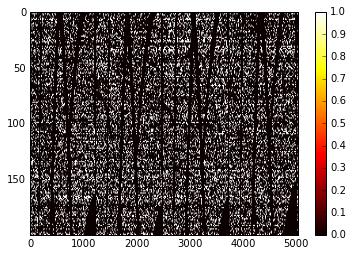

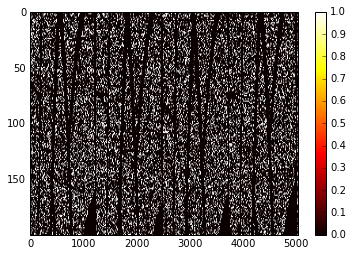

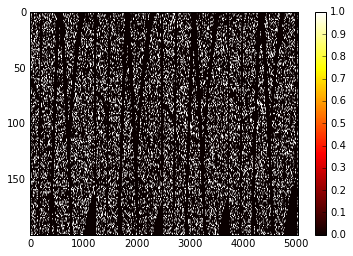

In [104]:
y=-10e-16
plt.imshow(raw_diffs.mean(0)<y, aspect='auto',
           cmap='hot')
plt.colorbar()
plt.figure()
plt.imshow(interp10_diff.mean(0)<y, aspect='auto'
          ,cmap='hot')
plt.colorbar()

plt.figure()
plt.imshow(interp5_diff.mean(0)<y, aspect='auto'
          ,cmap='hot')
plt.colorbar()

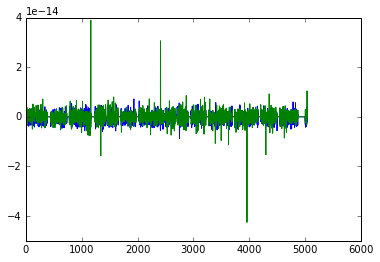

In [114]:
qidx = 166
plt.plot(raw_diffs.mean(0)[qidx])
plt.plot(interp5_diff.mean(0)[qidx])

(-1e-15, 5e-16)

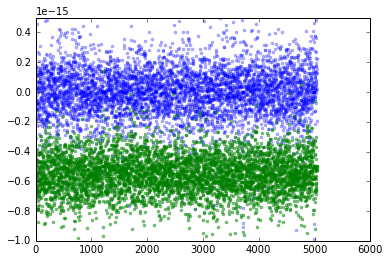

In [100]:
ii=100
# plt.plot(interp10_diff[3][ii])
# plt.plot(raw_diffs[0][ii], alpha=0.2)
# plt.ylim(-5,5)

dd=pmask.sum(0)
dd[dd==0]=1
interp_mean_diff =interp10_diff.mean(0).sum(0)/dd
raw_mean_diff = raw_diffs.mean(0).sum(0)/dd
plt.plot(interp_mean_diff,'.',alpha=0.3)
plt.plot(raw_mean_diff-5e-16, '.',alpha=0.5)
plt.ylim(-10e-16,5e-16)


# dd=pmask2.sum(0)
# dd[dd==0]=1
# plt.plot(interp5_diff.mean(0).sum(0)/dd,'.',alpha=0.3)
# # plt.plot(raw_diffs.mean(0)[-10:].mean(0), '.',alpha=0.5)
# plt.ylim(-1,1)

1.3976324551296401e-17

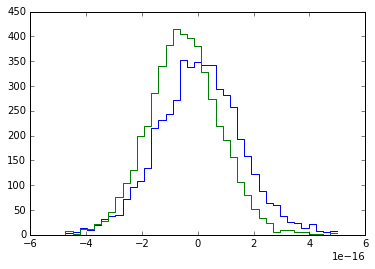

In [132]:
bins= np.linspace(-5e-16,5e-16,40)
hist1=np.histogram(interp_mean_diff[interp_mean_diff!=0],bins=bins)
hist2=np.histogram(raw_mean_diff[raw_mean_diff!=0],bins=bins)

# hist1=np.histogram(interp_mean_diff[qidx],bins=bins)
# hist2=np.histogram(raw_mean_diff[qidx],bins=bins)
# 
plt.step(bins[1:],hist1[0] )

plt.step(bins[1:],hist2[0] )
raw_mean_diff[qidx]

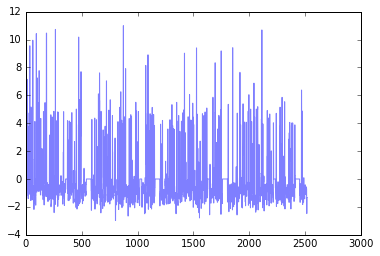

In [357]:
ii=4
# plt.plot(interp10_diff[100][ii])
# plt.ylim(-20,150)
plt.plot(raw_diffs[100][ii], alpha=0.5)
# plt.ylim(-5,40)

In [143]:
np.allclose( norm_5.mean(-1),0)
norm_5.dtype

dtype('float64')

In [144]:

qs = np.linspace(0,1.0, raw_diffs.shape[1])

dc_raw = DiffCorr(pmask[None,:], q_values=qs, k=0, pre_dif=True)
mask_cor = dc_raw.autocorr()

dc_raw = DiffCorr(raw_diffs, q_values=qs, k=0, pre_dif=True)
raw_cor = dc_raw.autocorr()#/mask_cor


dc_raw = DiffCorr(interp10_diff, q_values=qs, k=0, pre_dif=True)
interp10_cor = dc_raw.autocorr()#/mask_cor


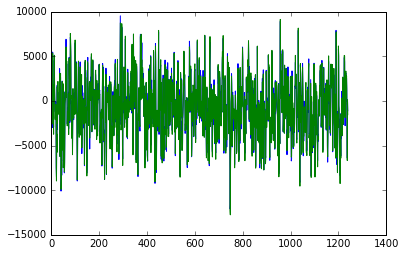

In [153]:
qidx = 4
num_phi = raw_cor.shape[-1]/2
phi_offset = 10

# plt.ylim(-10,20)
# plt.figure()
plt.plot(interp10_cor.mean(0)[qidx, phi_offset:num_phi/2-phi_offset])
plt.plot(raw_cor.mean(0)[qidx, phi_offset:num_phi/2-phi_offset])
# plt.ylim(-10,0)
# plt.xlim(0,200)
# plt.xlim(0,raw_cor.shape[-1]/2)


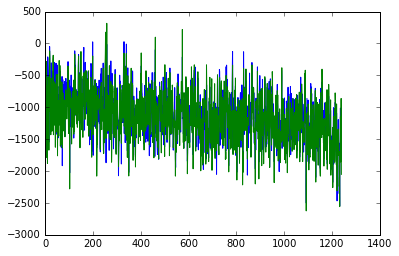

In [145]:
qidx = 198
num_phi = raw_cor.shape[-1]/2
phi_offset = 10
plt.plot(np.median(raw_cor.mean(0)[:,phi_offset:num_phi/2-phi_offset],axis=0),'-')

# plt.ylim(-10,20)
# plt.figure()
plt.plot(np.median(interp10_cor.mean(0)[:,phi_offset:num_phi/2-phi_offset],axis=0),'-')
# plt.plot(interp10_cor.mean(0)[qidx, phi_offset:num_phi/2-phi_offset])
# plt.ylim(-10,0)
# plt.xlim(0,200)
# plt.xlim(0,raw_cor.shape[-1]/2)

In [146]:
(interp10_diff==0).sum()/float(interp10_diff.size)

0.19015972222222222

In [368]:
(raw_diffs==0).sum()/float(raw_diffs.size)

0.16672016436078937

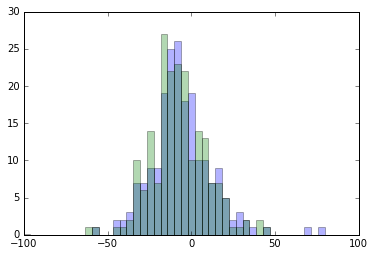

In [421]:
ii=100
bins = np.linspace(-100,100,50)
_=plt.hist(raw_cor.mean(0)[:,ii],bins=bins,
          alpha=0.3)
_=plt.hist(interp10_cor.mean(0)[:,ii],
           bins=bins, alpha=0.3)

In [415]:
ii = 100
print np.median(raw_cor.mean(0)[:,ii])
print interp10_cor.mean(0)[:,ii].mean()

-7.39720895264
-7.51964803079


In [9]:
40*56

2240